# Preparation 

## Import Library

In [18]:
# import library
import pandas as pd 
import numpy as np 


In [67]:
df = pd.read_csv(r"D:\Downloads\Churn Telco\WA_Fn-UseC_-Telco-Customer-Churn.csv")

## Quick Look

In [3]:
df.shape

(7043, 21)

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [49]:
categorical = list(df.select_dtypes("object").columns)
categorical

['customerID',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'TotalCharges',
 'Churn']

In [46]:
numeric = list(df.select_dtypes("number").columns)
numeric

['SeniorCitizen', 'tenure', 'MonthlyCharges']

In [50]:
df[categorical].head(3)

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
0,7590-VHVEG,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,5575-GNVDE,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,1889.5,No
2,3668-QPYBK,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,108.15,Yes


In [56]:
df[numeric].head(3)

,SeniorCitizen,tenure,MonthlyCharges
0,0,1,29.85
1,0,34,56.95
2,0,2,53.85


In [60]:
df['SeniorCitizen'].unique()

array([0, 1], dtype=int64)

# Change Type Data

In [71]:
transform = {'SeniorCitizen' : str,
             'TotalCharges' : float}

In [72]:
df = df.astype(transform)

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   object 
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


# Check Missing Value

In [6]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [61]:
## mising value 
a = df['TotalCharges']==' '
df.loc[a].head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No


## Handling Missing Value

In [69]:
df = df.drop(df[df.TotalCharges==' '].index)

In [70]:
##mising value 
a = df['TotalCharges']==' '
df.loc[a].head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


## Check Duplicated

In [8]:
df.duplicated().sum()

0

In [12]:
df['customerID'].duplicated().sum()

0

## Check Outlier

In [83]:
numeric = df.select_dtypes("number").columns
categorical = df.select_dtypes("object").columns

<AxesSubplot:>

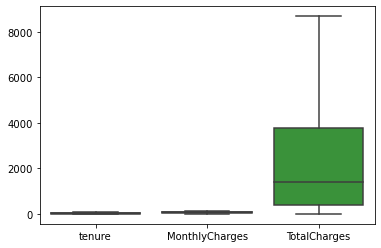

In [80]:
import seaborn as sns
sns.boxplot(data=df[numeric])

<AxesSubplot:>

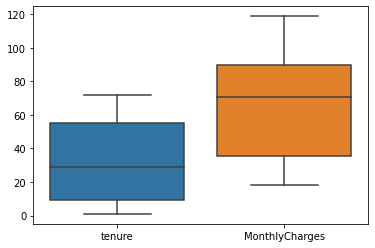

In [82]:
sns.boxplot(data=df[['tenure','MonthlyCharges']])

# Handle Dummy Variabel

In [84]:
df[categorical].describe().transpose()

,count,unique,top,freq
customerID,7032,7032,7590-VHVEG,1
gender,7032,2,Male,3549
SeniorCitizen,7032,2,0,5890
Partner,7032,2,No,3639
Dependents,7032,2,No,4933
PhoneService,7032,2,Yes,6352
MultipleLines,7032,3,No,3385
InternetService,7032,3,Fiber optic,3096
OnlineSecurity,7032,3,No,3497
OnlineBackup,7032,3,No,3087


In [86]:
df = df.drop('customerID',axis = 1)

In [89]:
categorical = df.select_dtypes("object").columns
df[categorical].describe().transpose()

,count,unique,top,freq
gender,7032,2,Male,3549
SeniorCitizen,7032,2,0,5890
Partner,7032,2,No,3639
Dependents,7032,2,No,4933
PhoneService,7032,2,Yes,6352
MultipleLines,7032,3,No,3385
InternetService,7032,3,Fiber optic,3096
OnlineSecurity,7032,3,No,3497
OnlineBackup,7032,3,No,3087
DeviceProtection,7032,3,No,3094


In [90]:
df[categorical].describe().transpose()['unique'].sum()

45

In [94]:
df['Churn'].unique()

array(['No', 'Yes'], dtype=object)

In [97]:
def transform(row) :
    if row['Churn']== 'No':
        return(0)
    else :
        return(1)

In [98]:
df['Churn'] = df.apply(transform, axis = 1)


In [99]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [100]:
df_dummy = pd.get_dummies(df)

In [101]:
df_dummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 47 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   tenure                                   7032 non-null   int64  
 1   MonthlyCharges                           7032 non-null   float64
 2   TotalCharges                             7032 non-null   float64
 3   Churn                                    7032 non-null   int64  
 4   gender_Female                            7032 non-null   uint8  
 5   gender_Male                              7032 non-null   uint8  
 6   SeniorCitizen_0                          7032 non-null   uint8  
 7   SeniorCitizen_1                          7032 non-null   uint8  
 8   Partner_No                               7032 non-null   uint8  
 9   Partner_Yes                              7032 non-null   uint8  
 10  Dependents_No                            7032 no

In [102]:
df_dummy.head()

,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,0,1,0,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0
1,34,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,1,0,1,0,0,0,0,1
2,2,53.85,108.15,1,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1
3,45,42.30,1840.75,0,0,1,1,0,1,0,...,0,0,1,0,1,0,1,0,0,0
4,2,70.70,151.65,1,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0


# Modeling


* Explore Target Variable
* X and Y (independent variables vs dependent variables)
* Train test split 
* Fitting Process
* Evaluation


## Explore Target Variable

In [105]:
from sklearn.model_selection import train_test_split

In [103]:
df_dummy['Churn'].value_counts(normalize=True)

0    0.734215
1    0.265785
Name: Churn, dtype: float64

## X and Y (Independent Variables VS Dependent Variables)

In [104]:
df_dummy.columns

Index(['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn', 'gender_Female',
       'gender_Male', 'SeniorCitizen_0', 'SeniorCitizen_1', 'Partner_No',
       'Partner_Yes', 'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',

In [108]:
x = df_dummy.drop('Churn', axis = 1)
y = df_dummy['Churn']

## Train Test Split 

In [110]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.3, random_state = 444, stratify=y)

In [111]:
y_test.value_counts(normalize=True)

0    0.734123
1    0.265877
Name: Churn, dtype: float64

In [112]:
y_train.value_counts(normalize=True)

0    0.734254
1    0.265746
Name: Churn, dtype: float64

In [113]:
df_dummy['Churn'].value_counts(normalize=True)

0    0.734215
1    0.265785
Name: Churn, dtype: float64

## Fitting Process

In [114]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [115]:
def evaluation(y_test, y_pred_proba):
	from sklearn.metrics import roc_auc_score,accuracy_score, f1_score,precision_score,recall_score

	y_pred = np.where(y_pred_proba>0.5,1,0)
	auc = roc_auc_score(y_test,y_pred_proba)
	f1 = f1_score(y_test,y_pred)
	accuracy = accuracy_score(y_test,y_pred)
	precision = precision_score(y_test,y_pred)
	recall = recall_score(y_test,y_pred)
	print('AUC', round(auc*100,4))
	print('F1', round(f1*100,4))
	print('ACCURACY', round(accuracy*100,4))
	print('PRECISION', round(precision*100,4))
	print('RECALL', round(recall*100,4))


In [116]:
rf = RandomForestClassifier()
grad = GradientBoostingClassifier()
dt = DecisionTreeClassifier()
lr = LogisticRegression()

In [117]:
x_train.head()

,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6203,69,105.10,7234.80,1,0,1,0,0,1,0,...,0,0,1,0,0,1,0,1,0,0
5610,3,75.50,220.60,1,0,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0
641,43,56.15,2499.30,1,0,1,0,0,1,0,...,0,1,0,0,1,0,0,0,1,0
4812,9,66.25,620.55,1,0,1,0,1,0,1,...,0,1,0,0,1,0,0,0,0,1
2621,71,79.10,5564.85,0,1,1,0,0,1,1,...,1,0,0,1,0,1,0,1,0,0


In [118]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [119]:
grad.fit(x_train,y_train)

GradientBoostingClassifier()

In [120]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [121]:
lr.fit(x_train,y_train)

C:\Users\Maxxi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## Evaluation

In [122]:
rf_pred = rf.predict_proba(x_test)[:,1]
grad_pred = grad.predict_proba(x_test)[:,1]
dt_pred = dt.predict_proba(x_test)[:,1]
lr_pred = lr.predict_proba(x_test)[:,1]


In [123]:
# Random Forest
evaluation(y_test, rf_pred)

AUC 80.9053
F1 55.4
ACCURACY 78.8626
PRECISION 63.0979
RECALL 49.3761


In [124]:
# Gradient Boosting
evaluation(y_test, grad_pred)

AUC 83.4615
F1 56.526
ACCURACY 79.0047
PRECISION 62.8821
RECALL 51.3369


In [125]:
# Decission Tree
evaluation(y_test, dt_pred)

AUC 65.7587
F1 49.7832
ACCURACY 72.5592
PRECISION 48.4797
RECALL 51.1586


In [126]:
# Logistic Regression
evaluation(y_test, lr_pred)

AUC 83.4963
F1 59.5215
ACCURACY 79.9526
PRECISION 64.2562
RECALL 55.4367


# Fit Undersampling Model 

In [127]:
!pip install imblearn

In [128]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state = 444)
x_resampled, y_resampled = rus.fit_resample(x_train,y_train)

In [129]:
rf.fit(x_resampled,y_resampled)

RandomForestClassifier()

In [130]:
grad.fit(x_resampled,y_resampled)

GradientBoostingClassifier()

In [131]:
dt.fit(x_resampled,y_resampled)

DecisionTreeClassifier()

In [132]:
lr.fit(x_resampled,y_resampled)

C:\Users\Maxxi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [133]:
rf_pred_rus = rf.predict_proba(x_resampled)[:,1]
grad_pred_rus = grad.predict_proba(x_resampled)[:,1]
dt_pred_rus = dt.predict_proba(x_resampled)[:,1]
lr_pred_rus = lr.predict_proba(x_resampled)[:,1]



In [134]:
# Random Forest
evaluation(y_resampled, rf_pred_rus)

AUC 99.9992
F1 99.8089
ACCURACY 99.8089
PRECISION 99.7708
RECALL 99.8471


In [135]:
# Gradient Boosting
evaluation(y_resampled, grad_pred_rus)

AUC 90.3226
F1 82.6617
ACCURACY 82.0719
PRECISION 80.0286
RECALL 85.474


In [136]:
# Decission Tree
evaluation(y_resampled, dt_pred_rus)

AUC 99.9995
F1 99.8469
ACCURACY 99.8471
PRECISION 100.0
RECALL 99.6942


In [137]:
# Logistic Regression
evaluation(y_resampled, lr_pred_rus)

AUC 84.8945
F1 77.6699
ACCURACY 77.1407
PRECISION 75.9124
RECALL 79.5107
